In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Membaca dataset
df = pd.read_csv(r'C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 17_Vending Machine Coffee Sales Analytics Dashboard By Alfin Bahru Rahmika Umar\index.csv')
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1308,2024-08-17,2024-08-17 16:31:54.837,card,ANON-0000-0000-0277,23.02,Cortado
1309,2024-08-17,2024-08-17 16:33:48.977,card,ANON-0000-0000-0192,32.82,Latte
1310,2024-08-17,2024-08-17 18:48:58.852,card,ANON-0000-0000-0456,32.82,Cappuccino
1311,2024-08-17,2024-08-17 21:18:56.806,card,ANON-0000-0000-0040,27.92,Americano with Milk


In [4]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (1313, 6)


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1313 non-null   object 
 1   datetime     1313 non-null   object 
 2   cash_type    1313 non-null   object 
 3   card         1224 non-null   object 
 4   money        1313 non-null   float64
 5   coffee_name  1313 non-null   object 
dtypes: float64(1), object(5)
memory usage: 61.7+ KB


,money
count,1313.000000
mean,32.465788
std,5.227782
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


In [7]:
# Menampilkan info awal dataset
print("=== Informasi Awal Dataset ===")
print(df.info())
print("\nJumlah duplikat:", df.duplicated().sum())
print("Missing values per kolom:\n", df.isnull().sum())

=== Informasi Awal Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1313 non-null   object 
 1   datetime     1313 non-null   object 
 2   cash_type    1313 non-null   object 
 3   card         1224 non-null   object 
 4   money        1313 non-null   float64
 5   coffee_name  1313 non-null   object 
dtypes: float64(1), object(5)
memory usage: 61.7+ KB
None

Jumlah duplikat: 0
Missing values per kolom:
 date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [8]:
# Mendeteksi outlier pada kolom 'money' menggunakan metode IQR
Q1 = df['money'].quantile(0.25)
Q3 = df['money'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['money'] < lower_bound) | (df['money'] > upper_bound)]
print("\nJumlah outlier pada kolom 'money':", outliers.shape[0])


Jumlah outlier pada kolom 'money': 0


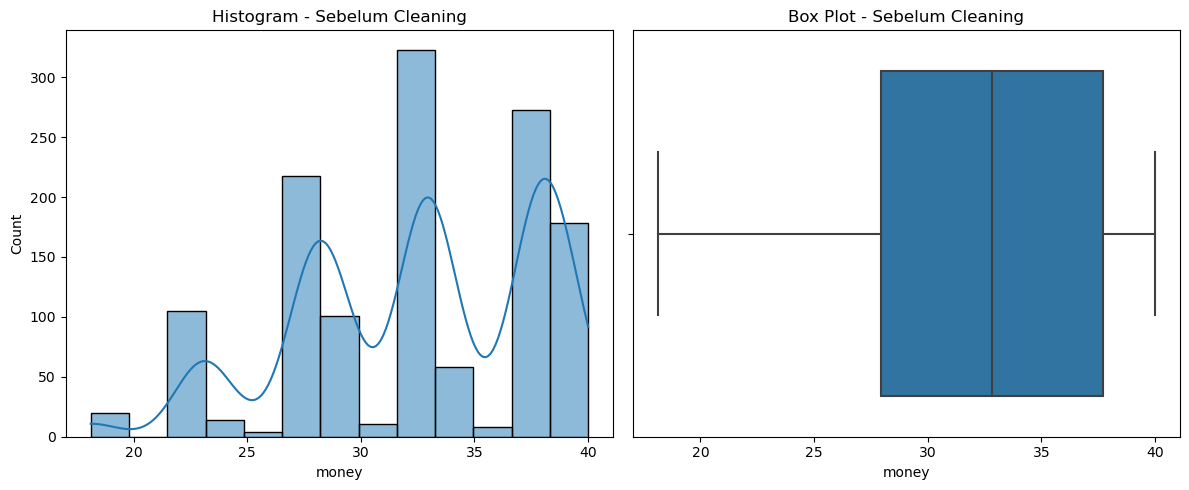

In [9]:
# Visualisasi awal: Histogram dan Box Plot untuk 'money'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['money'], kde=True)
plt.title('Histogram - Sebelum Cleaning')

plt.subplot(1,2,2)
sns.boxplot(x=df['money'])
plt.title('Box Plot - Sebelum Cleaning')
plt.tight_layout()
plt.show()

In [10]:
# Data Cleaning
# 1. Hapus duplikat
df_clean = df.drop_duplicates()

# 2. Hapus missing values (bisa disesuaikan jika ingin imputasi)
df_clean = df_clean.dropna()

# 3. Hapus outlier pada 'money'
df_clean = df_clean[(df_clean['money'] >= lower_bound) & (df_clean['money'] <= upper_bound)]

In [11]:
# Menampilkan info dataset setelah cleaning
print("\n=== Informasi Dataset Setelah Cleaning ===")
print(df_clean.info())


=== Informasi Dataset Setelah Cleaning ===
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1224 non-null   object 
 1   datetime     1224 non-null   object 
 2   cash_type    1224 non-null   object 
 3   card         1224 non-null   object 
 4   money        1224 non-null   float64
 5   coffee_name  1224 non-null   object 
dtypes: float64(1), object(5)
memory usage: 66.9+ KB
None


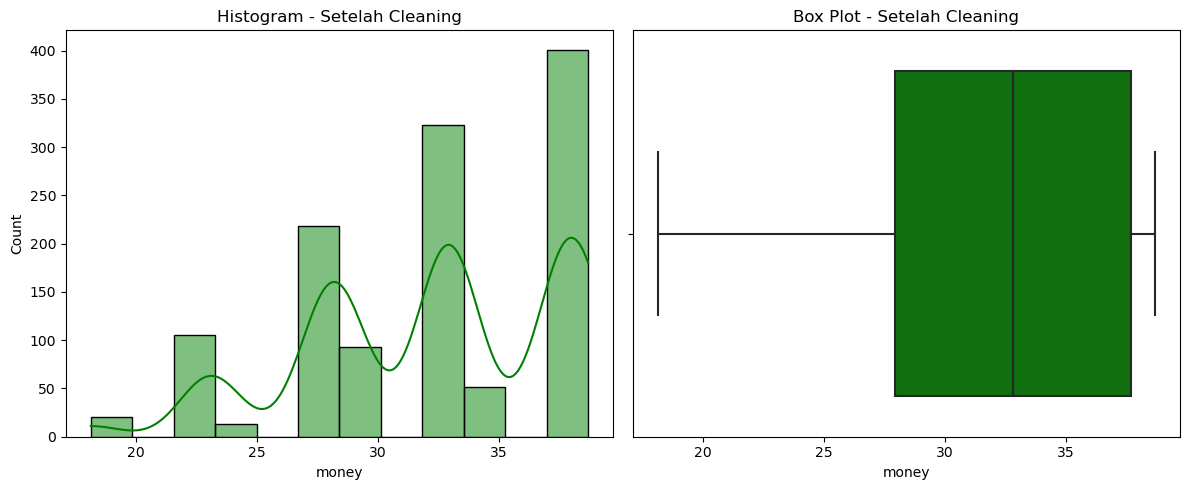

In [12]:
# Visualisasi setelah cleaning: Histogram dan Box Plot untuk 'money'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_clean['money'], kde=True, color='green')
plt.title('Histogram - Setelah Cleaning')

plt.subplot(1,2,2)
sns.boxplot(x=df_clean['money'], color='green')
plt.title('Box Plot - Setelah Cleaning')
plt.tight_layout()
plt.show()

In [13]:
# Menyimpan dataset yang telah dibersihkan
df_clean.to_csv('index-cleaned.csv', index=False)

In [14]:
# Pastikan kolom datetime dikonversi ke tipe datetime
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])

# Ekstrak Year dan Month dari datetime untuk line chart
df_clean['year_month'] = df_clean['datetime'].dt.to_period('M')

In [15]:
# Metrik terukur
total_coffee_types = df_clean['coffee_name'].nunique()
total_income = df_clean['money'].sum()
total_sales = df_clean.shape[0]
total_cards = df_clean['card'].count()  # jumlah non-null

print("Total Jenis Coffee:", total_coffee_types)
print("Total Income:", total_income)
print("Total Sales:", total_sales)
print("Total Cards:", total_cards)

Total Jenis Coffee: 8
Total Income: 39441.58
Total Sales: 1224
Total Cards: 1224


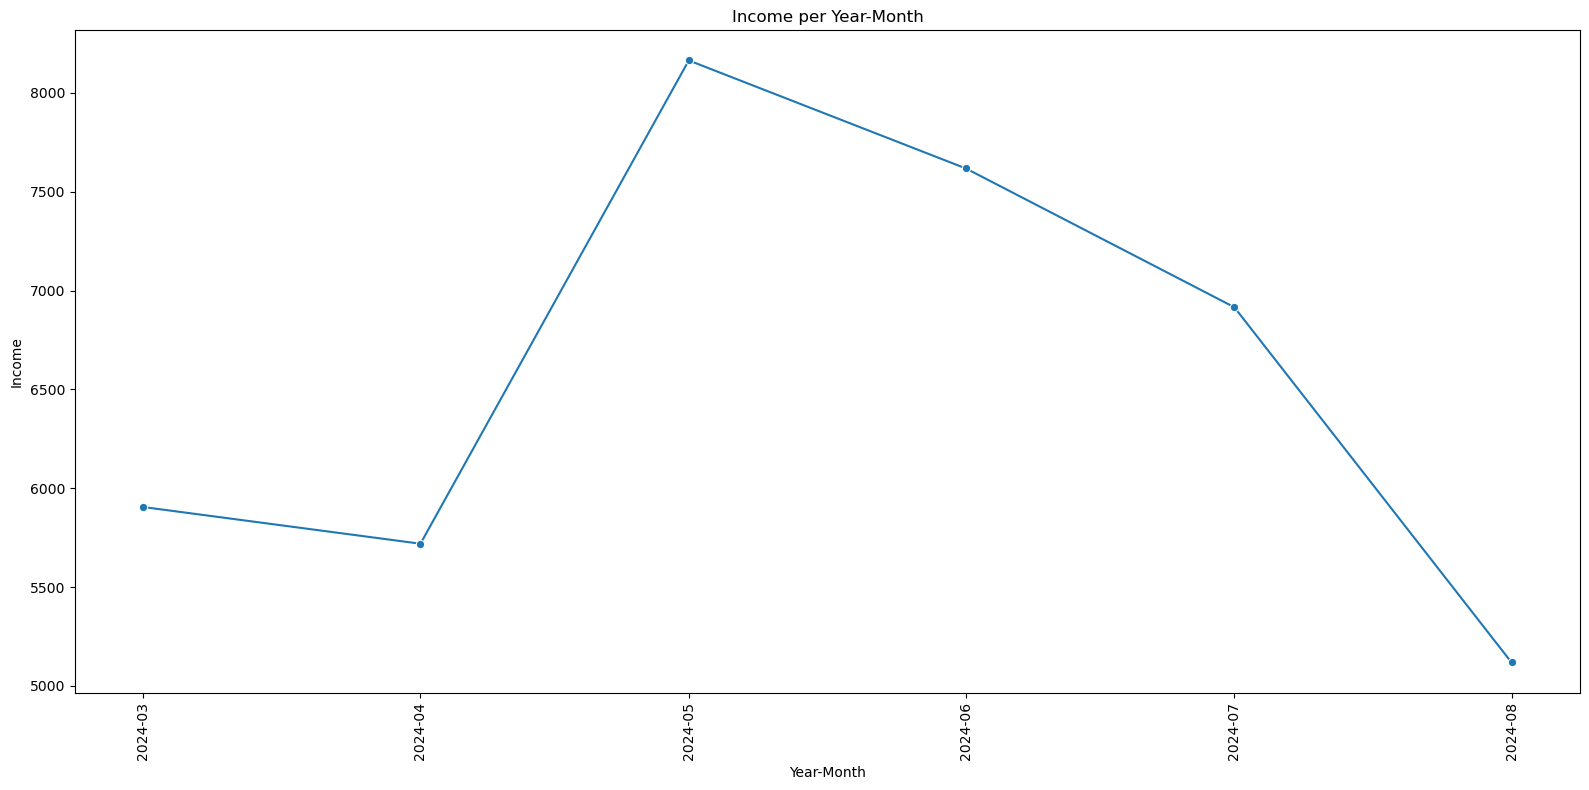

In [22]:
# Line Chart: Income per Year-Month
# Pastikan kolom datetime dikonversi ke tipe datetime
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])

# Ekstrak Year-Month sebagai timestamp (menggunakan awal bulan)
df_clean['year_month'] = df_clean['datetime'].dt.to_period('M').dt.to_timestamp()

# Grouping: hitung total income per bulan
income_per_month = df_clean.groupby('year_month')['money'].sum()

# Buat rentang tanggal lengkap dari bulan awal hingga bulan akhir
all_months = pd.date_range(start=income_per_month.index.min(), 
                           end=income_per_month.index.max(), freq='MS')

# Reindex income_per_month agar mencakup semua bulan, mengisi nilai yang hilang dengan 0
income_per_month = income_per_month.reindex(all_months, fill_value=0).reset_index()
income_per_month.columns = ['year_month', 'money']

# Visualisasi Line Chart
plt.figure(figsize=(16,8))
sns.lineplot(data=income_per_month, x='year_month', y='money', marker='o')
plt.xticks(rotation=90)
plt.title("Income per Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Income")
plt.tight_layout()
plt.show()


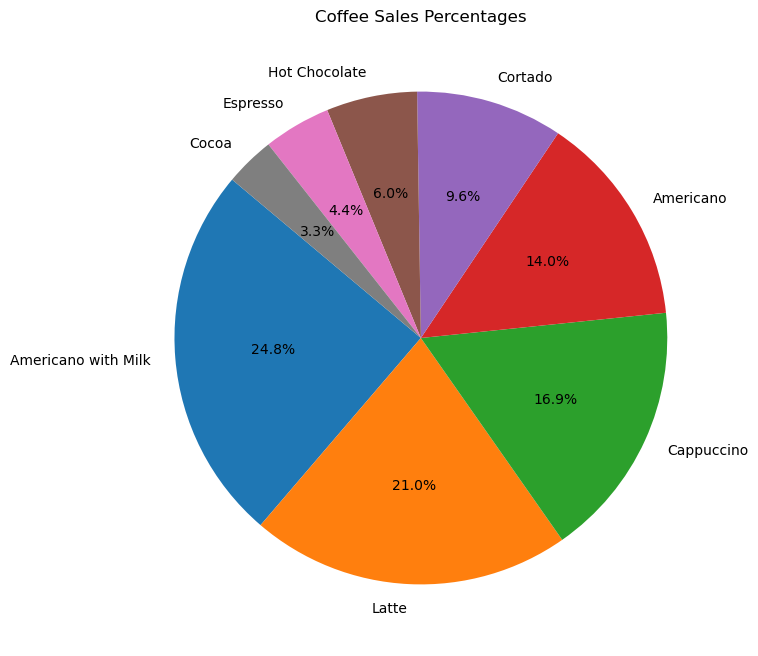

In [17]:
# Pie Chart: Coffee Sales Percentages
coffee_sales = df_clean['coffee_name'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(coffee_sales, labels=coffee_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Coffee Sales Percentages")
plt.show()

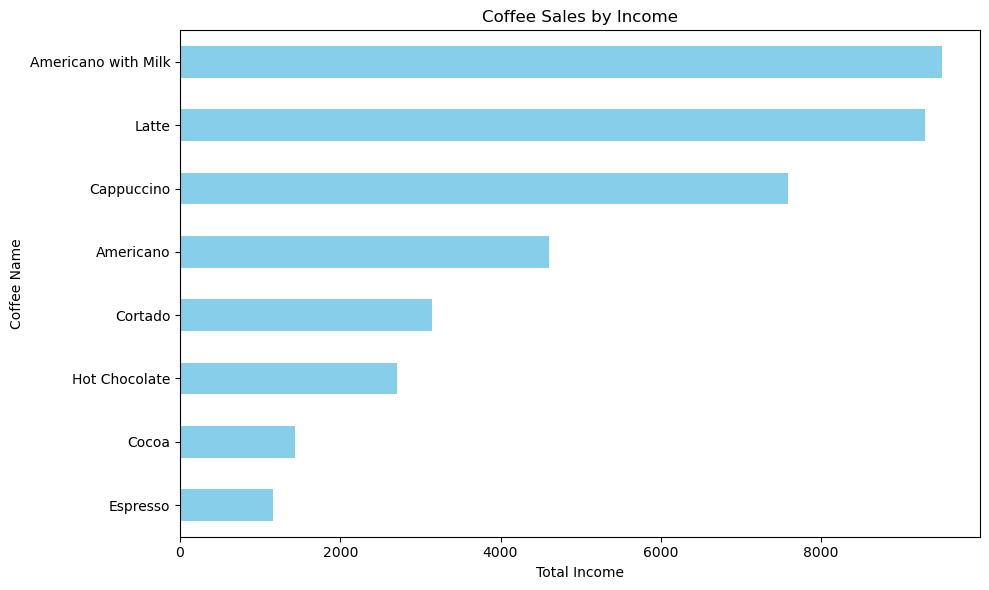

In [18]:
# Horizontal Bar Chart: Coffee Sales by Income
coffee_income = df_clean.groupby('coffee_name')['money'].sum().sort_values()
plt.figure(figsize=(10,6))
coffee_income.plot(kind='barh', color='skyblue')
plt.title("Coffee Sales by Income")
plt.xlabel("Total Income")
plt.ylabel("Coffee Name")
plt.tight_layout()
plt.show()

In [19]:
# import dash
# from dash import dcc, html
# import plotly.express as px

# # Membuat DataFrame untuk grafik line (Income per Year-Month)
# income_per_month['year_month'] = pd.to_datetime(income_per_month['year_month'])
# fig_line = px.line(income_per_month, x='year_month', y='money', 
#                    title="Income per Year-Month", markers=True)

# # Pie chart dengan Plotly
# fig_pie = px.pie(values=coffee_sales.values, names=coffee_sales.index, 
#                  title="Coffee Sales Percentages")

# # Bar chart horizontal dengan Plotly
# coffee_income_sorted = coffee_income.reset_index()
# fig_bar = px.bar(coffee_income_sorted, x='money', y='coffee_name', 
#                  orientation='h', title="Coffee Sales by Income")

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Dashboard Data Coffee"),
#     html.Div([
#         html.Div([
#             html.H3("Metrik Utama"),
#             html.P(f"Total Jenis Coffee: {total_coffee_types}"),
#             html.P(f"Total Income: {total_income}"),
#             html.P(f"Total Sales: {total_sales}"),
#             html.P(f"Total Cards: {total_cards}")
#         ], style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top'}),
#         html.Div([
#             dcc.Graph(figure=fig_line)
#         ], style={'width': '65%', 'display': 'inline-block'})
#     ]),
#     html.Div([
#         html.Div([
#             dcc.Graph(figure=fig_pie)
#         ], style={'width': '48%', 'display': 'inline-block'}),
#         html.Div([
#             dcc.Graph(figure=fig_bar)
#         ], style={'width': '48%', 'display': 'inline-block'})
#     ])
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
